#  Judge, Jury, and Classifier: An Introduction to Trees

In [1]:
stevens = read.csv("stevens.csv")

In [2]:
str(stevens)

'data.frame':	566 obs. of  9 variables:
 $ Docket    : Factor w/ 566 levels "00-1011","00-1045",..: 63 69 70 145 97 181 242 289 334 436 ...
 $ Term      : int  1994 1994 1994 1994 1995 1995 1996 1997 1997 1999 ...
 $ Circuit   : Factor w/ 13 levels "10th","11th",..: 4 11 7 3 9 11 13 11 12 2 ...
 $ Issue     : Factor w/ 11 levels "Attorneys","CivilRights",..: 5 5 5 5 9 5 5 5 5 3 ...
 $ Petitioner: Factor w/ 12 levels "AMERICAN.INDIAN",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Respondent: Factor w/ 12 levels "AMERICAN.INDIAN",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ LowerCourt: Factor w/ 2 levels "conser","liberal": 2 2 2 1 1 1 1 1 1 1 ...
 $ Unconst   : int  0 0 0 0 0 1 0 1 0 0 ...
 $ Reverse   : int  1 1 1 1 1 0 1 1 1 1 ...


In [3]:
head(stevens)

,Docket,Term,Circuit,Issue,Petitioner,Respondent,LowerCourt,Unconst,Reverse
1,93-1408,1994,2nd,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
2,93-1577,1994,9th,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
3,93-1612,1994,5th,EconomicActivity,BUSINESS,BUSINESS,liberal,0,1
4,94-623,1994,1st,EconomicActivity,BUSINESS,BUSINESS,conser,0,1
5,94-1175,1995,7th,JudicialPower,BUSINESS,BUSINESS,conser,0,1
6,95-129,1995,9th,EconomicActivity,BUSINESS,BUSINESS,conser,1,0


In [4]:
# #Docket - Unique Identifier for each case
# #Term - Year

# #INDEPENDENT VARIABLES
# #Circuit - Circuit Court of Origin
# #Issue
# #Petitioner - Type
# #Respondent - Type
# #LowerCourt
# #Unconst - Uncostituitional

# #DEPENDENT VARIABLE
# #Reverse - 1 Affirm(Not Reverse) - 0

In [5]:
# #Splitting into Training and Testing Data
library(caTools)

Warning message:
: package 'caTools' was built under R version 3.2.5

In [6]:
# set.seed(3000)
set.seed(200)

In [7]:
spl = sample.split(stevens$Reverse, SplitRatio = 0.7)

In [8]:
Train = subset(stevens, spl == TRUE)

In [9]:
Test = subset(stevens, spl == FALSE)

In [10]:
# #CART

In [11]:
# install.packages("rpart")
# install.packages("rpart.plot")

In [12]:
library(rpart)
library(rpart.plot)

Warning message:
: package 'rpart' was built under R version 3.2.5Warning message:
: package 'rpart.plot' was built under R version 3.2.5

In [13]:
# #method = "class" -> Tells R to build a Classification Tress, instead of a Regression Tree
StevensTree = rpart(Reverse ~ (Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst), data = Train, method = "class",
                    minbucket = 25)

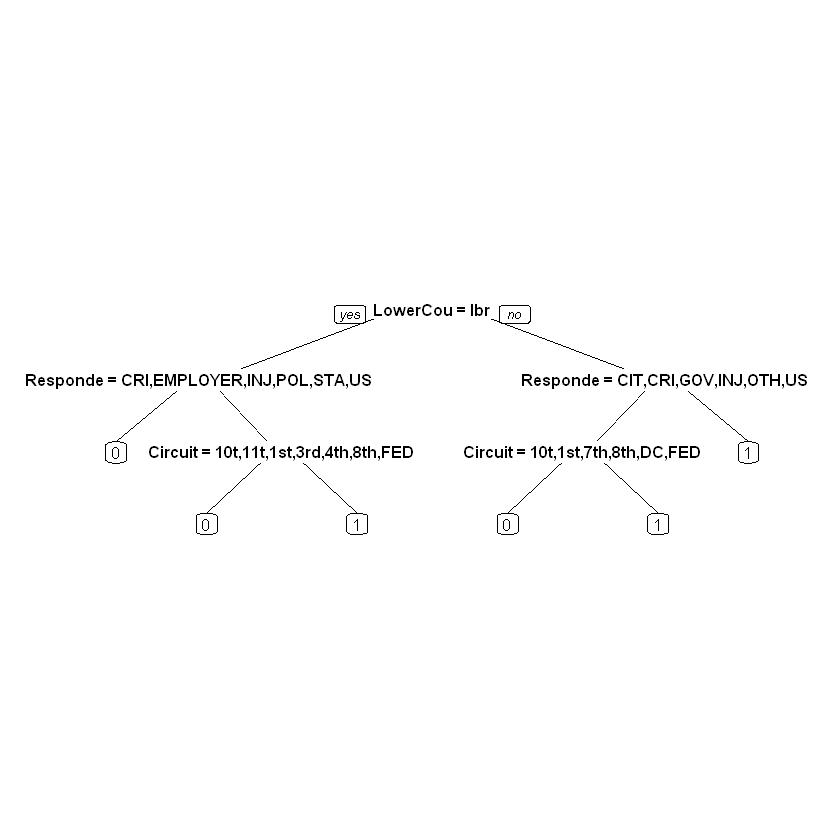

In [14]:
prp(StevensTree)

In [15]:
# #type = "class" -> Majority Class predictions
predictCART = predict(StevensTree, newdata = Test, type = "class")

In [16]:
# #Confusion Matrix
table(Test$Reverse, predictCART)

   predictCART
     0  1
  0 35 42
  1 26 67

In [17]:
# #Accuracy of CART Model
(41+71)/(41+71+36+22)

[1] 0.6588235

In [18]:
# #ROC Curve

In [19]:
library(ROCR)

Warning message:
: package 'ROCR' was built under R version 3.2.5Loading required package: gplots
Warning message:
: package 'gplots' was built under R version 3.2.5
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [20]:
predictROC = predict(StevensTree, newdata = Test)

In [21]:
# #Probablity of Outcome 0 and Outcome 1
predictROC

,0,1
4,0.144444444444444,0.855555555555556
5,0.144444444444444,0.855555555555556
6,0.144444444444444,0.855555555555556
7,0.144444444444444,0.855555555555556
8,0.144444444444444,0.855555555555556
14,0.388888888888889,0.611111111111111
21,0.388888888888889,0.611111111111111
28,0.388888888888889,0.611111111111111
34,0.144444444444444,0.855555555555556
35,0.144444444444444,0.855555555555556


In [22]:
pred = prediction(predictROC[,2], Test$Reverse)

In [23]:
pref = performance(pred, "tpr", "fpr")

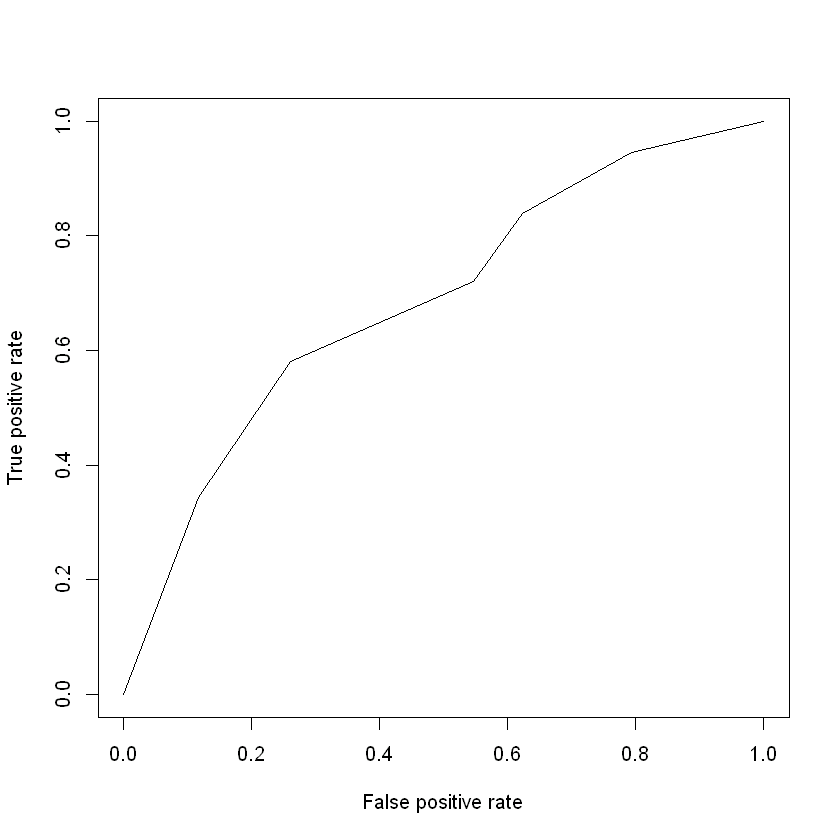

In [24]:
# #ROC Curve
plot(pref)

In [25]:
# #Computing the Test Set AUC
as.numeric(performance(pred, "auc")@y.values)

[1] 0.6856584

In [26]:
StevensTree_1 = rpart(Reverse ~ (Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst), data = Train, method = "class",
                    minbucket = 5)

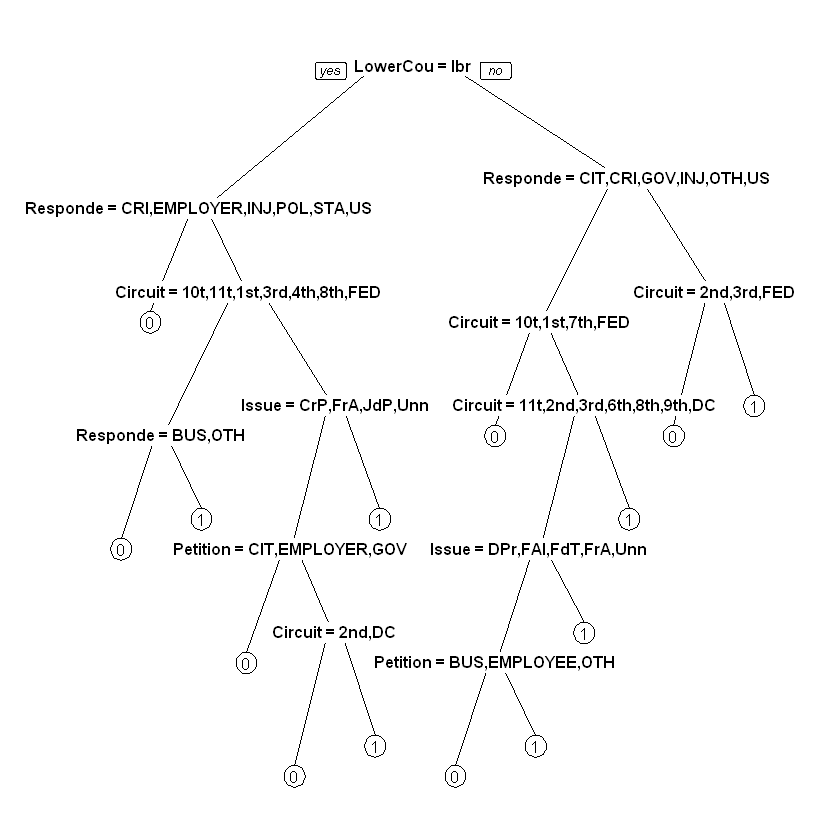

In [27]:
prp(StevensTree_1)

In [28]:
StevensTree_2 = rpart(Reverse ~ (Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst), data = Train, method = "class",
                    minbucket = 100)

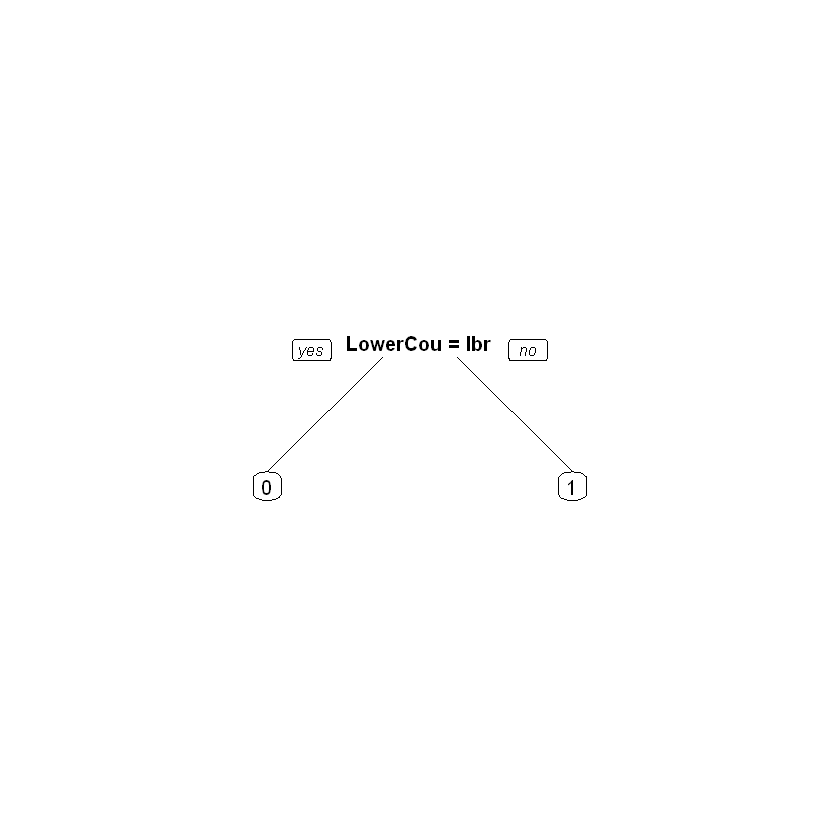

In [29]:
prp(StevensTree_2)

In [30]:
# #RANDOM FOREST
# #install.packages("randomForest")

In [31]:
library(randomForest)

Warning message:
: package 'randomForest' was built under R version 3.2.5randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.


In [32]:
StevensForest = randomForest(Reverse ~ (Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst), 
                             data = Train, nodesize = 25, ntree = 200)

Warning message:
In randomForest.default(m, y, ...): The response has five or fewer unique values.  Are you sure you want to do regression?

In [33]:
# #Performs Regression instead of classification

In [34]:
Train$Reverse = as.factor(Train$Reverse)
Test$Reverse = as.factor(Test$Reverse)

In [35]:
StevensForest = randomForest(Reverse ~ (Circuit + Issue + Petitioner + Respondent + LowerCourt + Unconst), 
                             data = Train, nodesize = 25, ntree = 200)

In [36]:
StevensForest


Call:
 randomForest(formula = Reverse ~ (Circuit + Issue + Petitioner +      Respondent + LowerCourt + Unconst), data = Train, nodesize = 25,      ntree = 200) 
               Type of random forest: classification
                     Number of trees: 200
No. of variables tried at each split: 2

        OOB estimate of  error rate: 33.59%
Confusion matrix:
    0   1 class.error
0 104  76   0.4222222
1  57 159   0.2638889

In [37]:
PredictForest = predict(StevensForest, newdata = Test)

In [38]:
# #Confusion Matrix
table(Test$Reverse, PredictForest)

   PredictForest
     0  1
  0 43 34
  1 22 71

In [39]:
accuracy = (40+74)/(19+37+40+74)

In [40]:
accuracy

[1] 0.6705882

## CROSS VALIDATION

In [41]:
# #Cross Validation for the CART Model

In [42]:
# install.packages("caret")
# install.packages("e1071")

In [49]:
library(caret)

Warning message:
: package 'caret' was built under R version 3.2.5Loading required package: ggplot2
Warning message:
: package 'ggplot2' was built under R version 3.2.5

ERROR: Error: package 'ggplot2' could not be loaded


In [50]:
library(e1071)

Warning message:
: package 'e1071' was built under R version 3.2.5